# Lecture 3
* generate random numbers in numpy
* Use Boltzman weight for a simple Hamiltonian

In [62]:
#--------------------------------
#--- import system libraries
#--------------------------------

import numpy as np
import matplotlib.pylab as plt
import matplotlib
import imp
#--- user defined
from utilFuncs import * 
#imp.reload(utilFuncs)

#--- figure settings
matplotlib.rcParams['text.usetex'] = True #--- comment tex stuff!

* plot energy landscape

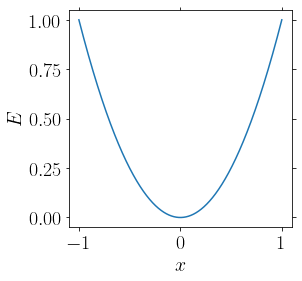

<AxesSubplot:xlabel='$x$', ylabel='$E$'>

In [63]:

nsamp=50000
H=lambda x: x*x
x=np.linspace(-1,1,nsamp)

PltErr(x,H(x),
#      xlim=(0,2.5), #--- range in x
#      ylim=(-2,2), #--- range in y
      attrs={'fmt':'-'}, #--- solid line
      xstr='$x$', #--- x-axis label
      ystr='$E$', #--- y-axis label
      )




* random numbers in numpy

In [3]:
help(np.random)

Help on package numpy.random in numpy:

NAME
    numpy.random

DESCRIPTION
    Random Number Generation
    
    Use ``default_rng()`` to create a `Generator` and call its methods.
    
    =============== =========================================================
    Generator
    --------------- ---------------------------------------------------------
    Generator       Class implementing all of the random number distributions
    default_rng     Default constructor for ``Generator``
    =============== =========================================================
    
    ============================================= ===
    BitGenerator Streams that work with Generator
    --------------------------------------------- ---
    MT19937
    PCG64
    PCG64DXSM
    Philox
    SFC64
    ============================================= ===
    
    ============================================= ===
    Getting entropy to initialize a BitGenerator
    --------------------------------------------

In [4]:
help(np.random.normal)

Help on built-in function normal:

normal(...) method of numpy.random.mtrand.RandomState instance
    normal(loc=0.0, scale=1.0, size=None)
    
    Draw random samples from a normal (Gaussian) distribution.
    
    The probability density function of the normal distribution, first
    derived by De Moivre and 200 years later by both Gauss and Laplace
    independently [2]_, is often called the bell curve because of
    its characteristic shape (see the example below).
    
    The normal distributions occurs often in nature.  For example, it
    describes the commonly occurring distribution of samples influenced
    by a large number of tiny, random disturbances, each with its own
    unique distribution [2]_.
    
    .. note::
        New code should use the ``normal`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    loc : float or array_like of floats
        Mean ("centre") of the distribution

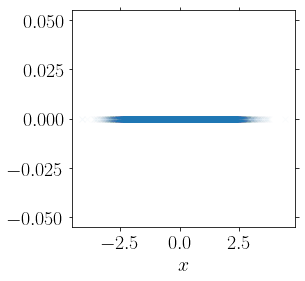

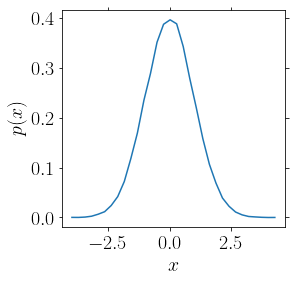

<AxesSubplot:xlabel='$x$', ylabel='$p(x)$'>

In [89]:
#--- sample from a normal distribution
x = np.random.normal(size=nsamp)

PltErr(x,np.zeros(len(x)),
#      xlim=(0,2.5), #--- range in x
#      ylim=(-2,2), #--- range in y
      attrs={'fmt':'x','alpha':.02}, #--- solid line
      xstr='$x$', #--- x-axis label
      )

#--- make a histogram
hist, bin_edges = np.histogram(x,bins=32, density=True)
bin_edges = 0.5*(bin_edges[:-1]+bin_edges[1:]) #--- center

PltErr(bin_edges,hist,
#      xlim=(0,2.5), #--- range in x
#      ylim=(-2,2), #--- range in y
      attrs={'fmt':'-'}, #--- solid line
      xstr='$x$', #--- x-axis label
      ystr='$p(x)$', #--- y-axis label
      )


* sample states based on Boltzman weight

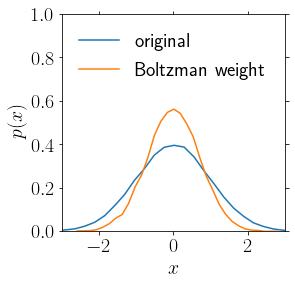

<AxesSubplot:xlabel='$x$', ylabel='$p(x)$'>

In [92]:
kbt = 1.0
prob = np.exp(-H(x)/kbt) #--- weight 

#--- sample x based on 'prob'
filtr = np.random.random(size=nsamp) < prob

#--- filter x
x_sampled = x[filtr]


#--- plot p(x)
ax = PltErr(bin_edges,hist,
      attrs={'fmt':'-','label':'original'}, #--- solid line
      Plot = False,
      )

#--- make a histogram (x_sampled)
hist2, bin_edges2 = np.histogram(x_sampled,bins=32, density=True)
bin_edges2 = 0.5*(bin_edges2[:-1]+bin_edges2[1:]) #--- center

#--- plot p(x_sampled)
PltErr(bin_edges2,hist2,
      xlim=(-3,3), #--- range in x
      ylim=(0,1), #--- range in y
      attrs={'fmt':'-','label':'Boltzman weight'}, #--- solid line
      xstr='$x$', #--- x-axis label
      ystr='$p(x)$', #--- y-axis label
      Plot = True,
      ax=ax,
      legend=True,
      )

* plot energies

0.5014072982199254


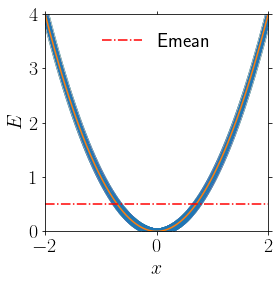

<AxesSubplot:xlabel='$x$', ylabel='$E$'>

In [93]:
#--- plot landscape
#x=np.linspace(-2,2,nsamp)

ax=PltErr(x,H(x),
      attrs={'fmt':'x','alpha':0.02}, #--- solid line
      Plot=False
      )

#--- plot sampled points
x=np.linspace(np.min(x_sampled),np.max(x_sampled),nsamp)
ax = PltErr(x,H(x),
      attrs={'fmt':'-'}, #--- solid line
       ax=ax,
       Plot=False
      )

#--- plot mean
emean = np.mean(H(x_sampled))
print(emean)
PltErr([-2,2],[emean,emean],
      xlim=(-2,2), #--- range in x
      ylim=(0,4), #--- range in y
      attrs={'fmt':'-.r','label':'Emean'}, #--- solid line
      xstr='$x$', #--- x-axis label
      ystr='$E$', #--- y-axis label
       ax=ax,
       Plot=True,
       legend=True,
      )


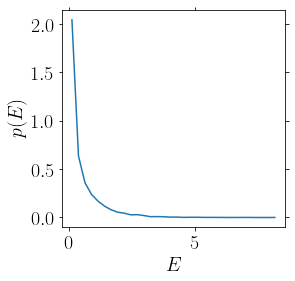

<AxesSubplot:xlabel='$E$', ylabel='$p(E)$'>

In [94]:
#--- make a histogram (x_sampled)
hist2, bin_edges2 = np.histogram(H(x_sampled),bins=32, density=True)
bin_edges2 = 0.5*(bin_edges2[:-1]+bin_edges2[1:]) #--- center

#--- plot p(x_sampled)
PltErr(bin_edges2,hist2,
#      xlim=(0,2.5), #--- range in x
#      ylim=(-2,2), #--- range in y
      attrs={'fmt':'-','label':'Boltzman weight'}, #--- solid line
      xstr='$E$', #--- x-axis label
      ystr='$p(E)$', #--- y-axis label
      )


# Q1
* Change $T$ and plot mean energy $\langle E \rangle $ against $T$

0.6581072817411558


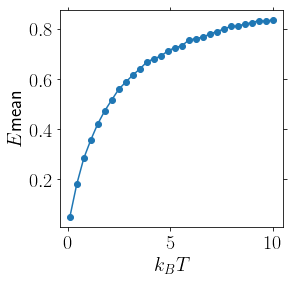

<AxesSubplot:xlabel='$k_BT$', ylabel='$E$mean'>

In [103]:
def BoltzmanSampling(x,hx,kbt):
    prob = np.exp(-hx/kbt) #--- weight 

    #--- sample x based on 'prob'
    nsamp = len(x)
    filtr = np.random.random(size=nsamp) < prob

    #--- filter x
    return x[filtr]
    
#--- sample from a normal distribution
x_orig = np.random.normal(size=nsamp)
x_sampled = BoltzmanSampling(x_orig,H(x_orig),4.0)
print (np.mean(H(x_sampled)))

#--- multiple temperatures
Ti = 0.1
Tf=10.0
KBT = np.linspace(Ti,Tf,30)
emean = list(map(lambda x:np.mean(H(BoltzmanSampling(x_orig,H(x_orig),x))),KBT))

#--- plot
PltErr(KBT,emean,
#      xlim=(0,2.5), #--- range in x
#      ylim=(-2,2), #--- range in y
      attrs={'fmt':'-o','label':'Boltzman weight'}, #--- solid line
      ystr='$E$mean', #--- x-axis label
      xstr='$k_BT$', #--- y-axis label
      )